In [266]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

pd.options.display.max_columns=30

In [267]:
df = pd.read_csv('edi.csv', sep='\t', nrows= 10000)
df.head()

,ID_GRUPO,ID_KEYWORD,FECHA,IMPRESSIONS,CLICKS,KEYWORD
0,13621622603,19921742269,20180101,4,0,+radiator +repair
1,13621622603,21439723136,20180101,2,0,+used +alloy +wheels
2,13621622603,22493584405,20180101,1,0,+mazda +in +australia
3,13621622603,23261625721,20180101,2,0,+patterson +cheney
4,13621622603,24274422897,20180101,1,0,+ford +focus +2002


In [315]:
#IDENTIFYING NUMBER OF GROUPS

df.groupby('ID_GRUPO')['CLICKS'].count().head()


#more than 100...

ID_GRUPO
13621622603    122
13621622723     93
13621622843     17
13621622963     91
13621623083     57
Name: CLICKS, dtype: int64

In [318]:
#IDENTIFYING NUMBER OF KW GROUPS

df.groupby('ID_KEYWORD')['CLICKS'].count().head()

#more than 100...

ID_KEYWORD
2989718045    1
3304408726    1
3724544912    1
4707527969    1
5635761169    1
Name: CLICKS, dtype: int64

In [270]:
#KEYWORDS LENGTH COLUMNS CREATION

df['KEYWORD_LENGHT'] = df['KEYWORD'].apply(len)
df.head()

,ID_GRUPO,ID_KEYWORD,FECHA,IMPRESSIONS,CLICKS,KEYWORD,KEYWORD_LENGHT
0,13621622603,19921742269,20180101,4,0,+radiator +repair,17
1,13621622603,21439723136,20180101,2,0,+used +alloy +wheels,20
2,13621622603,22493584405,20180101,1,0,+mazda +in +australia,21
3,13621622603,23261625721,20180101,2,0,+patterson +cheney,18
4,13621622603,24274422897,20180101,1,0,+ford +focus +2002,18


In [271]:
#CREATE CTR COLUMNS

df['CTR'] = df['CLICKS'].divide(df['IMPRESSIONS'], axis=0, level=None, fill_value=None)*100
df.head()

,ID_GRUPO,ID_KEYWORD,FECHA,IMPRESSIONS,CLICKS,KEYWORD,KEYWORD_LENGHT,CTR
0,13621622603,19921742269,20180101,4,0,+radiator +repair,17,0.0
1,13621622603,21439723136,20180101,2,0,+used +alloy +wheels,20,0.0
2,13621622603,22493584405,20180101,1,0,+mazda +in +australia,21,0.0
3,13621622603,23261625721,20180101,2,0,+patterson +cheney,18,0.0
4,13621622603,24274422897,20180101,1,0,+ford +focus +2002,18,0.0


In [272]:
#ROUND THE % NUMBERS AND CHANGE FLOAT TO INT

df['CTR'] = df['CTR'].round().astype(int)

In [273]:
df.dtypes

ID_GRUPO           int64
ID_KEYWORD         int64
FECHA              int64
IMPRESSIONS        int64
CLICKS             int64
KEYWORD           object
KEYWORD_LENGHT     int64
CTR                int32
dtype: object

In [321]:
df.head()

,ID_GRUPO,ID_KEYWORD,FECHA,IMPRESSIONS,CLICKS,KEYWORD,KEYWORD_LENGHT,CTR
0,13621622603,19921742269,20180101,4,0,+radiator +repair,17,0
1,13621622603,21439723136,20180101,2,0,+used +alloy +wheels,20,0
2,13621622603,22493584405,20180101,1,0,+mazda +in +australia,21,0
3,13621622603,23261625721,20180101,2,0,+patterson +cheney,18,0
4,13621622603,24274422897,20180101,1,0,+ford +focus +2002,18,0


In [334]:
df['CLICKS'].value_counts()

0    9084
1     862
2      47
3       6
4       1
Name: CLICKS, dtype: int64

In [335]:
df['IMPRESSIONS'].value_counts()

1      7949
2      1402
3       366
4       156
5        47
6        24
7        14
8        11
10        6
9         4
18        3
19        2
11        2
27        2
12        2
20        1
28        1
13        1
37        1
17        1
14        1
30        1
168       1
16        1
23        1
Name: IMPRESSIONS, dtype: int64

In [341]:
df['CTR'].value_counts()

0      9084
100     612
50      170
33       47
25       34
200       9
20        8
67        8
17        5
40        5
14        4
12        2
75        2
60        1
30        1
43        1
5         1
18        1
10        1
29        1
6         1
9         1
7         1
Name: CTR, dtype: int64

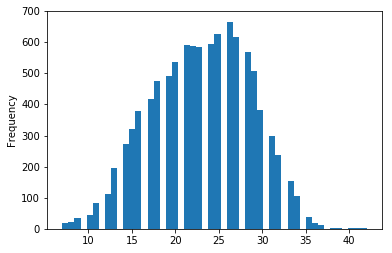

In [336]:
df['KEYWORD_LENGHT'].plot(bins=50, kind='hist') 

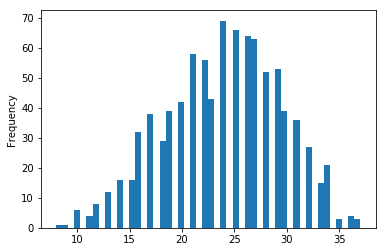

In [344]:
df[df['CTR']>0]['KEYWORD_LENGHT'].plot(bins=50, kind='hist') 

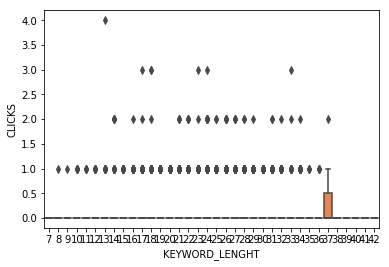

In [346]:
sns.boxplot(x='KEYWORD_LENGHT',y='CLICKS',data=df,palette='rainbow')